In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
#read in the data
df = pd.read_csv('../../data/1on1/city_Shooting.csv')

In [3]:
df.head()

,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,Ederson,br BRA,GK,29-053,9.0,0,0,0,NaN,0.00,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
1,Erling Haaland,no NOR,FW,22-080,8.3,15,38,20,52.6,4.55,...,10.9,0,1,1,9.0,8.2,0.22,6.0,5.8,Matches
2,João Cancelo,pt POR,DF,28-135,8.2,2,9,2,22.2,1.10,...,22.3,0,0,0,0.3,0.3,0.04,1.7,1.7,Matches
3,Phil Foden,eng ENG,FW,22-134,7.3,6,20,12,60.0,2.74,...,12.1,0,0,0,3.5,3.5,0.17,2.5,2.5,Matches
4,Kevin De Bruyne,be BEL,MF,31-103,7.6,1,22,7,31.8,2.91,...,20.9,2,0,0,1.5,1.5,0.07,-0.5,-0.5,Matches


In [4]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [5]:
df.Player.unique()

array(['Ederson', 'Erling Haaland', 'João Cancelo', 'Phil Foden',
       'Kevin De Bruyne', 'Rodri', 'Rúben Dias', 'Bernardo Silva',
       'Kyle Walker', 'İlkay Gündoğan', 'John Stones', 'Nathan Aké',
       'Jack Grealish', 'Riyad Mahrez', 'Manuel Akanji', 'Julián Álvarez',
       'Sergio Gómez', 'Cole Palmer', 'Rico Lewis', 'Aymeric Laporte',
       'Kalvin Phillips'], dtype=object)

In [6]:
df = df[(df['Player']=='İlkay Gündoğan') | (df['Player']=='Jack Grealish')].reset_index()

In [7]:
df

,index,Player,Nation,Pos,Age,90s,Gls,Sh,SoT,SoT%,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,9,İlkay Gündoğan,de GER,MF,31-350,5.9,2,12,3,25.0,...,17.3,2,0,0,1.4,1.4,0.11,0.6,0.6,Matches
1,12,Jack Grealish,eng ENG,FW,27-029,3.5,1,5,2,40.0,...,14.2,0,0,0,0.8,0.8,0.16,0.2,0.2,Matches


In [8]:
df = df.drop(['index','Nation','Pos','Age','90s','FK','PK','PKatt','Matches'],axis=1)

In [9]:
df

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,İlkay Gündoğan,2,12,3,25.0,2.02,0.51,0.17,0.67,17.3,1.4,1.4,0.11,0.6,0.6
1,Jack Grealish,1,5,2,40.0,1.42,0.57,0.20,0.50,14.2,0.8,0.8,0.16,0.2,0.2


In [10]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [11]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'İlkay Gündoğan':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Jack Grealish':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [12]:
values

[[2, 12, 3, 25.0, 2.02, 0.51, 0.17, 0.67, 17.3, 1.4, 1.4, 0.11, 0.6, 0.6],
 [1, 5, 2, 40.0, 1.42, 0.57, 0.2, 0.5, 14.2, 0.8, 0.8, 0.16, 0.2, 0.2]]

In [13]:
#title 
title = dict(
  title_name='İlkay Gündoğan',
  title_color='#9B3647',
  subtitle_name="Man City",
  subtitle_color='#ABCDEF',
  title_name_2='Jack Grealish',
  title_color_2='#3282b8',
  subtitle_name_2="Man City",
  subtitle_color_2='#ABCDEF',
  title_fontsize=18,
  subtitle_fontsize=15
)

endnote = '@cityzens\ndata via FBREF / Statsbomb'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

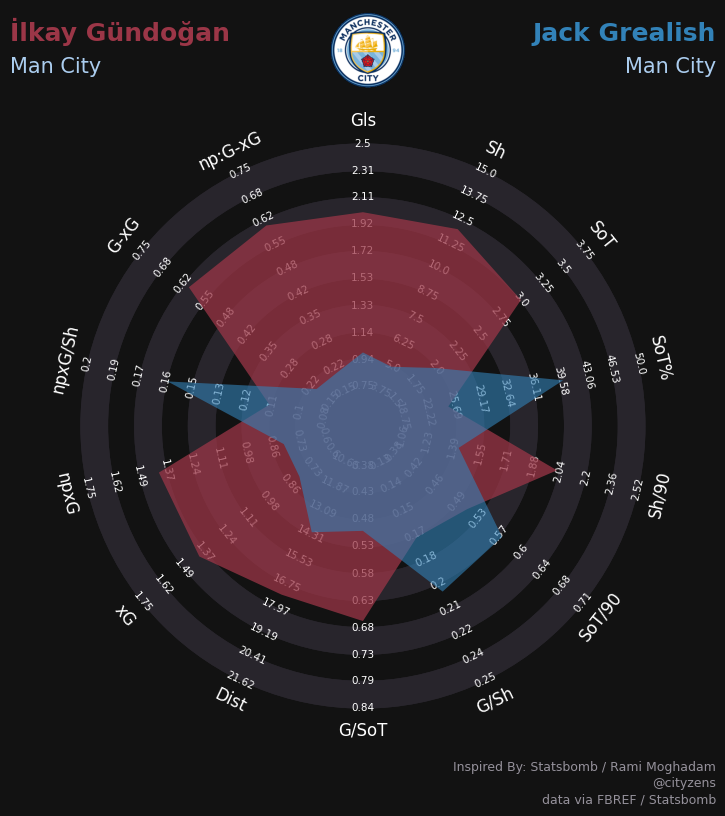

In [14]:
radar = Radar(
  label_fontsize=12,
  range_fontsize=7.5,
  background_color="#121212",
  patch_color="#28252C",
  label_color="#FFFFFF",
  range_color="#FFFFFF"
)

fig,ax = radar.plot_radar(
  ranges=ranges,
  params=params,
  values=values,
  radar_color=['#9B3647', '#3282b8'],
  alphas=[.75,.6],
  title=title,
  image='../../images/mancitylogo.png',
  image_coord=[0.495, 0.805, 0.04, 0.1],
  compare=True,
  filename="../../output/1on1/city_shooting_ilkay_vs_Jack.jpg",
  endnote=endnote,
)